In [1]:
#Random Forest 

#RF的参数基本就是决策树和Bagging的参数集合

#必须处理缺失值！尝试发现训练集中自变量和因变量都不能缺失，测试集中自变量不能缺失(有缺失就会报错)。
#必须处理定性变量！进行独热编码。

In [16]:
#RF-回归问题：以R语言rpart包中car.test.frame数据为例。我将数据导出，存储为car.csv
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import numpy as np

#os.chdir(r"C:\Users\liyan\Documents\教学\数据挖掘\2019秋季\python\data") #切换路径
alldata_X = pd.read_csv(r'C:\Users\jessica\Desktop\统计机器学习\Bootstrap1_feature_X(1).csv')
alldata_Y = pd.read_csv(r'C:\Users\jessica\Desktop\统计机器学习\Bootstrap1_feature_Y(1).csv')

X_train, X_test, y_train, y_test = train_test_split(
    alldata_X,alldata_Y, test_size=1/3, random_state=1) #划分训练集和测试集；当y为定性变量时，可设置stratify=y进行分层抽样

In [17]:
#数据预处理（按照决策树要求）
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_features = np.where(X_train.dtypes != object)[0]
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

categorical_features = np.where(X_train.dtypes == object)[0]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
X_train_dum = pd.get_dummies(X_train)#获取变量名，在变量重要性图中展示用
X_train_dum

,geo_index,floor_height,population_dense,supstructure,secondary_use,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
76680,3.396615,3.000000,0.100000,1.826379,2,2,100,10,6,0,...,0,0,0,0,0,0,0,0,1,0
93623,2.933261,2.000000,0.166667,0.644443,0,2,20,6,4,0,...,0,0,0,0,0,0,0,0,1,0
80676,1.662047,2.000000,0.166667,0.406598,2,1,5,6,2,0,...,0,0,0,0,0,0,0,0,1,0
7508,1.662047,2.000000,0.166667,0.644443,0,2,5,6,4,0,...,0,0,0,0,0,0,0,0,1,0
138672,2.623057,3.000000,0.047619,0.882287,0,1,5,21,3,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109259,2.725272,2.000000,0.200000,0.644443,0,2,15,5,4,0,...,0,0,0,0,0,0,0,0,1,0
50057,3.139733,2.500000,0.125000,0.644443,0,2,5,8,5,1,...,0,0,0,0,0,0,0,0,1,0
5192,3.529782,3.000000,0.058824,0.882287,0,4,30,17,12,0,...,0,0,0,0,0,0,0,0,1,0
208780,3.041089,2.333333,0.333333,0.644443,0,3,15,3,7,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_features=15, max_depth=10, 
                            bootstrap=True,oob_score=True, random_state=1)
#n_estimators为基学习器个数, max_features为每次分枝时随机抽取的变量个数
#bootstrap为True则采用Bootstrap样本建立决策树，False则采用训练集中所有样本建立决策树
#oob_score可以产生由袋外样本对模型的评价，random_state为随机数种子

clf_pipe = Pipeline([
  ('preprocessing', preprocessor),
  ('clf', clf)])
clf_pipe.fit(X_train, y_train)
#clf.oob_score_ #没有找到这个score的说明，猜测是R-squared(下面会验证)

c:\Users\jessica\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69], dtype=int64)),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  array([], dtype=int64))])),
                ('clf',
                 RandomForestClassifier(max_depth=10, max_features=15,
                                        oob_score=True, random_state=1))])

In [35]:
clf.oob_score_

0.6953214285714285

In [5]:
clf.oob_prediction_

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_prediction_'

In [8]:
from sklearn.metrics import r2_score
r2_score(y_train,clf.oob_prediction_) #果然与oob_score_是一致的

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_prediction_'

In [36]:
#预测
y_pred = clf_pipe.predict(X_test)
y_pred

array([1, 1, 3, ..., 1, 2, 3], dtype=int64)

In [37]:
#预测的效果：
sum(y_pred==y_test.values.reshape(-1))/len(y_pred)




0.6927

In [23]:
#变量重要性
clf.feature_importances_

array([5.57850450e-02, 1.35062927e-02, 1.13302243e-02, 2.72180914e-02,
       3.81643812e-03, 1.95049522e-02, 4.60122464e-02, 1.70798101e-02,
       2.50198418e-02, 8.95998491e-03, 1.25366677e-01, 2.68076428e-03,
       9.58056105e-04, 3.37059081e-03, 4.61717568e-02, 1.02104419e-02,
       4.37074235e-03, 1.06694408e-02, 2.41838649e-02, 1.60118718e-03,
       5.93929493e-03, 3.79861120e-04, 1.55675842e-04, 1.12618217e-02,
       8.75233966e-03, 4.59371309e-06, 1.37273867e-07, 3.94036385e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.67381532e-05,
       3.20417385e-04, 4.06905718e-05, 6.22947268e-04, 3.93312021e-04,
       6.09467756e-02, 1.01749186e-01, 1.84464399e-02, 3.25856592e-02,
       4.90699710e-03, 6.93288884e-03, 6.84760634e-02, 3.64734071e-02,
       6.88311580e-05, 5.07373139e-02, 1.22581902e-04, 1.00856111e-04,
       2.05265317e-02, 4.94062390e-02, 3.40625938e-02, 3.41581963e-03,
       2.47730980e-03, 4.78679373e-04, 2.50733566e-03, 2.43044044e-03,
      

Text(0.5, 1.0, 'Variances Importances')

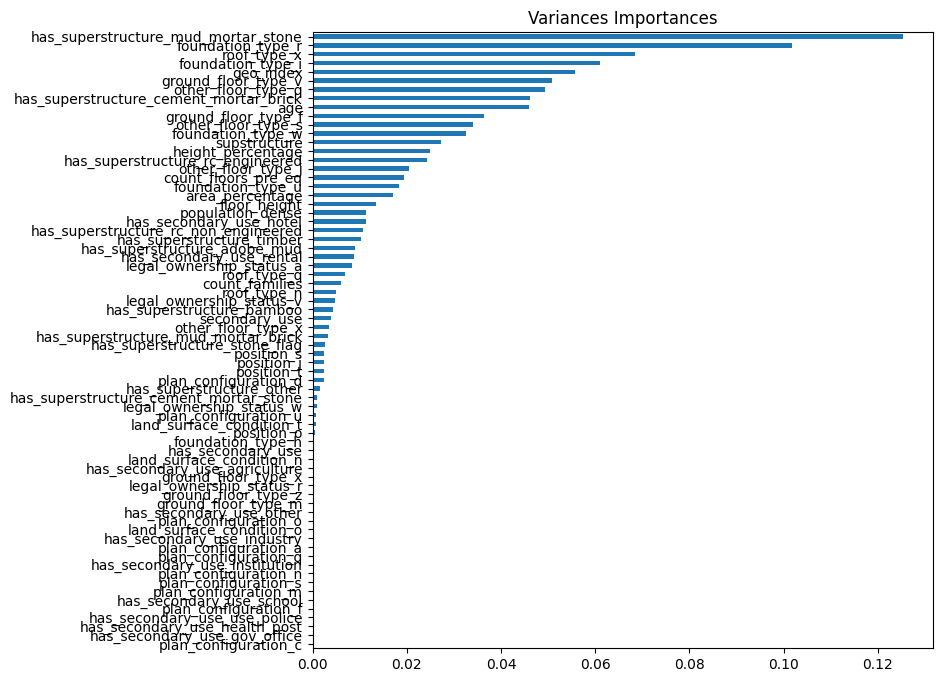

In [22]:
#变量重要性作图
import matplotlib.pyplot as plt
clf_importance = pd.Series(clf.feature_importances_ ,index = X_train.columns, name = 'Var')

plt.figure(figsize=(8,8))
clf_importance.sort_values().plot(kind='barh')
plt.title("Variances Importances")

In [11]:
#试着将变量重要性还原到独热编码之前的变量

X_trainpreprocess = pd.DataFrame(preprocessor.fit_transform(X_train))#定量变量在前，定性变量在后
X_train_dum = pd.get_dummies(X_train)
X_trainpreprocess.columns = X_train_dum.columns #借用get_dummies中的变量名

Country_index = X_trainpreprocess.columns.str.startswith('Country')
Type_index = X_trainpreprocess.columns.str.startswith('Type')
Country_importance = sum(clf_importance[Country_index])
Type_importance = sum(clf_importance[Type_index])
clf_importance2 = pd.Series(np.hstack((Country_importance,Type_importance)) ,index = ['Country','Type'], name = 'Var')
#合并独热编码变量后的变量重要性
pd.Series(np.hstack((clf_importance[0:4],clf_importance2)),index=np.hstack((clf_importance[0:4].index,clf_importance2.index)))

Reliability    0.033128
Price          0.205034
Weight         0.190708
Disp.          0.247965
Country        0.033625
Type           0.164530
dtype: float64

In [9]:
#采用交叉验证选取最优参数，这里选取max_depth和n_estimators两个参数
from sklearn.model_selection import GridSearchCV, KFold
a=[]
b=[]
for i in range(1,5):
    a.append(i)
for j in range(40,200,20):
    b.append(j)
param_grid=[{'clf__max_depth':a,'clf__n_estimators':b}] #一定要注意clf后面是两根下划线！
gs = GridSearchCV(estimator=clf_pipe,
               param_grid=param_grid,
               scoring='r2',
               cv=KFold(n_splits=2, random_state=1, shuffle=True))
gs = gs.fit(X_train,y_train)

c:\Users\jessica\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\jessica\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\jessica\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\jessica\AppData\Local\Programs\Python\Python310\l

In [10]:
gs.best_params_ #最佳参数组合

{'clf__max_depth': 3, 'clf__n_estimators': 40}

In [14]:
gs.best_score_ #最佳参数组合下的R-squared

0.6456810177803473

In [15]:
gs.cv_results_

{'mean_fit_time': array([0.05834305, 0.07629108, 0.09773576, 0.1301403 , 0.1431241 ,
        0.17353511, 0.18251204, 0.21095097, 0.05886364, 0.08126271,
        0.10019886, 0.14264071, 0.17204046, 0.1800139 , 0.25431979,
        0.21293294, 0.05332661, 0.08229768, 0.10276079, 0.13563955,
        0.15510964, 0.17104375, 0.21392691, 0.23289263, 0.06086504,
        0.08373809, 0.10171008, 0.15008044, 0.14960051, 0.18847942,
        0.24883556, 0.25881004]),
 'std_fit_time': array([4.52053547e-03, 5.04493713e-04, 9.85980034e-04, 3.51190567e-03,
        5.38349152e-04, 1.99413300e-03, 4.76837158e-07, 5.49948215e-03,
        6.00528717e-03, 2.51495838e-03, 2.49207020e-03, 1.39859915e-02,
        4.66585159e-04, 1.49774551e-03, 1.79520845e-02, 3.53062153e-03,
        4.87327576e-04, 8.46087933e-03, 2.98690796e-03, 5.95414639e-03,
        5.25236130e-04, 6.48176670e-03, 1.74545050e-02, 2.64457464e-02,
        2.00021267e-03, 5.98645210e-03, 2.01225281e-03, 6.49905205e-03,
        2.99119949e-0

In [11]:
gs.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67],
      dtype=int64)),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  array([], dtype=int64))])),
                ('clf',
                 RandomForestClassifier(max_depth=3, max_features=3,
                                        n_estimators=40, oob_score=True,
                                        random_state=1))])

In [12]:
#使用最优参数做预测
clf_pipe = gs.best_estimator_
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
sum(y_pred==y_test.values.reshape(-1))/len(y_pred)

c:\Users\jessica\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.6097100344667102

In [18]:
#试试嵌套交叉验证下的效果
from sklearn.model_selection import GridSearchCV,cross_val_score

gs=GridSearchCV(estimator=clf_pipe,
               param_grid=param_grid,
               scoring='r2', 
               cv=KFold(n_splits=2, random_state=1, shuffle=True))
scores = cross_val_score(gs,X,y,scoring='r2',
                         cv=KFold(n_splits=3, random_state=1, shuffle=True)) 
#注意，这里应该用所有的数据，而不能是之前划分的训练集X_train
print('CV R2 of Tree: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
scores

CV R2 of Tree: 0.710 +/- 0.079


array([0.81958639, 0.67448543, 0.63512926])